<font size="+3"><strong>2.1. Predicting Price with Size</strong></font>

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted


**Task 2.1.1:** Write a function named `wrangle` that takes a file path as an argument and returns a DataFrame.

In [2]:
def wrangle(filepath):
    # Read CSV file into DataFrame
    df = pd.read_csv(filepath)
    
    # Subset to properties in "Capital Federal"
    mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
    
    # Subset to "apartments"
    mask_apt = df['property_type'] == 'apartment'
    
    # Subset to properties where 'price_aprox_usd' < 400000
    mask_price = df['price_aprox_usd'] < 400000
    
    # Subset
    df = df[mask_ba & mask_apt & mask_price]
    
    # Remove outliers by 'surface_covered_in_m2'
    low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
    mask_area = df['surface_covered_in_m2'].between(low, high)
    
    df = df[mask_area]
    
    return df

**Task 2.1.2:** Use your `wrangle` function to create a DataFrame `df` from the CSV file `data/raw/buenos-aires-real-estate-1.csv`.

In [3]:
df = wrangle("../data/raw/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...


**Task 2.1.3:** Add to your `wrangle` function so that the DataFrame it returns only includes apartments in Buenos Aires (`"Capital Federal"`) that cost less than $400,000 USD. Then recreate `df` from `data/buenos-aires-real-estate-1.csv` by re-running the cells above. 

**Task 2.1.4:** Create a histogram of `"surface_covered_in_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Apartment Sizes"`.

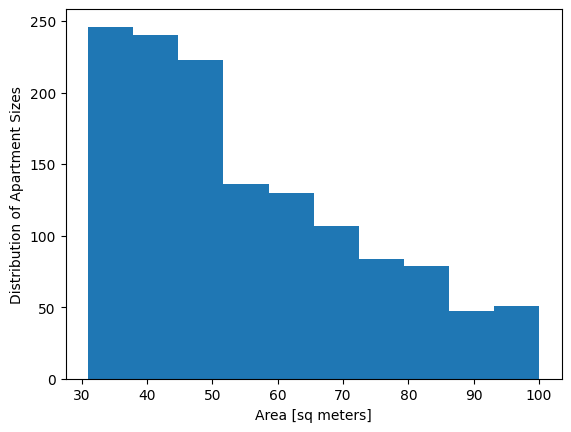

In [4]:
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Distribution of Apartment Sizes');

**Task 2.1.5:** Calculate the summary statistics for `df` using the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method. 

In [5]:
df['surface_covered_in_m2'].describe()

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

**Task 2.1.6:** Add to your wrangle function so that it removes observations that are outliers in the `"surface_covered_in_m2"` column. Specifically, all observations should fall between the `0.1` and `0.9` quantiles for `"surface_covered_in_m2"`.

**Task 2.1.7:** Create a scatter plot that shows price (`"price_aprox_usd"`) vs area (`"surface_covered_in_m2"`) in our dataset. Make sure to label your x-axis `"Area [sq meters]"` and your y-axis `"Price [USD]"`.

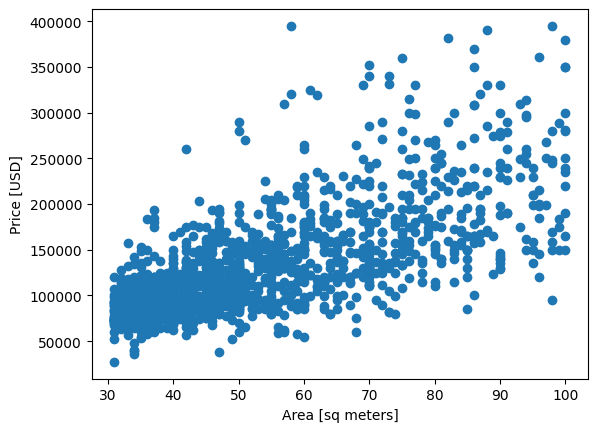

In [6]:
plt.scatter(x = df['surface_covered_in_m2'], y=df['price_aprox_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]');

**Task 2.1.8:** Create the feature matrix named `X_train`, which you'll use to train your model. It should contain one feature only: `["surface_covered_in_m2"]`. Remember that your feature matrix should always be two-dimensional. 


In [7]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1343, 1)

**Task 2.1.9:** Create the target vector named `y_train`, which you'll use to train your model. Your target should be `"price_aprox_usd"`. Remember that, in most cases, your target vector should be one-dimensional. 


In [8]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1343,)

**Task 2.1.10:** Calculate the mean of your target vector `y_train` and assign it to the variable `y_mean`.

In [9]:
y_mean = y_train.mean()
y_mean

np.float64(135527.83871928515)

**Task 2.1.11:** Create a list named `y_pred_baseline` that contains the value of `y_mean` repeated so that it's the same length at `y`.

In [10]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515)]

**Task 2.1.12:** Add a line to the plot below that shows the relationship between the observations `X_train` and our dumb model's predictions `y_pred_baseline`. Be sure that the line color is orange, and that it has the label `"Baseline Model"`.

In [11]:
X_train

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0
...,...
8589,42.0
8590,41.0
8593,43.0
8601,70.0


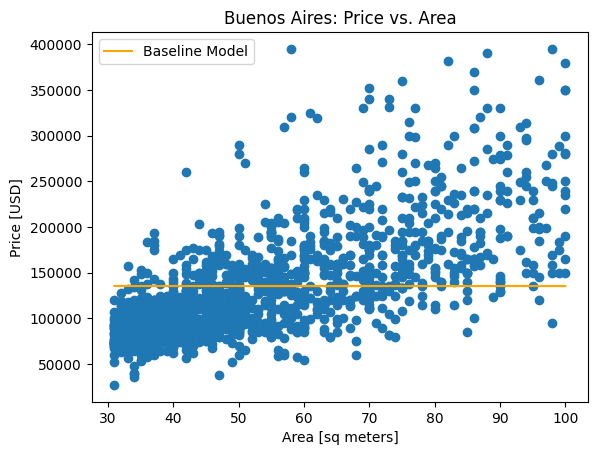

In [12]:
plt.plot(X_train['surface_covered_in_m2'], y_pred_baseline, color='orange', label='Baseline Model')
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

**Task 2.1.13:** Calculate the baseline mean absolute error for your predictions in `y_pred_baseline` as compared to the true targets in `y`.

In [13]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


**Task 2.1.14:** Instantiate a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model named `model`.


In [14]:
model = LinearRegression()

**Task 2.1.15:** Fit your model to the data, `X_train` and `y_train`.

In [15]:
model.fit(X_train, y_train)

LinearRegression()

**Task 2.1.16:** Using your model's [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method, create a list of predictions for the observations in your feature matrix `X_train`. Name this array `y_pred_training`. 


In [16]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

**Task 2.1.17:** Calculate your training mean absolute error for your predictions in `y_pred_training` as compared to the true targets in `y_train`.


In [17]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


**Task 2.1.18:** Run the code below to import your test data `buenos-aires-test-features.csv` into a DataFrame and generate a Series of predictions using your model. Then run the following cell to submit your predictions to the grader.


In [19]:
X_test = pd.read_csv("../data/raw/buenos-aires-test-features.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    117330.058901
1    135355.037823
2     88039.468152
3     88039.468152
4    106064.447074
dtype: float64

**Task 2.1.19:** Extract the intercept from your model, and assign it to the variable `intercept`. 

In [20]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 11433.31


**Task 2.1.20:** Extract the coefficient associated `"surface_covered_in_m2"` in your model, and assign it to the variable `coefficient`.

In [21]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 2253.12


**Task 2.1.21:** Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on size.

In [22]:
print(f"apt_price = {intercept} + {coefficient}* surface_covered")

apt_price = 11433.31 + 2253.12* surface_covered


**Task 2.1.22:** Add a line to the plot below that shows the relationship between the observations in `X_train` and your model's predictions `y_pred_training`. Be sure that the line color is red, and that it has the label `"Linear Model"`.

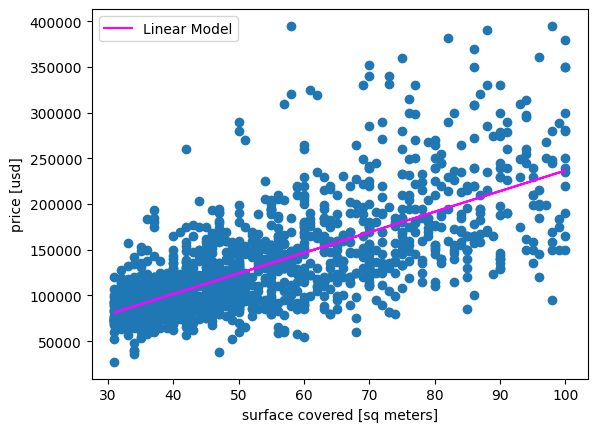

In [23]:
plt.plot(X_train, model.predict(X_train), color='magenta', label='Linear Model')
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();